In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Reference data files *** USE ONLY ONE FILE IF ONLY ADDRESSING ONE QUESTION ***
crime_data_path = "Resources/one_year_dc-crimes-search-results.csv"
weather_data_path = "output_data/dc_weather.csv"

# Read the data files 
crime_data = pd.read_csv(crime_data_path)
weather_data = pd.read_csv(weather_data_path)

#Reduce to the columns we need - those by day and not hour
weather_day = weather_data[["Date_ID","date", "avgtemp_f", "totalprecip_in","avghumidity","day_condition"]]
weather_day.tail()

,Date_ID,date,avgtemp_f,totalprecip_in,avghumidity,day_condition
360,360,2023-02-01,36.5,0.00,63.0,Overcast
361,361,2023-02-02,35.1,0.08,66.0,Light drizzle
362,362,2023-02-03,33.3,0.00,49.0,Partly cloudy
363,363,2023-02-04,26.8,0.00,35.0,Cloudy
364,364,2023-02-05,41.1,0.00,61.0,Overcast


In [4]:
# Review of data is under Question 1 file. Decide if to combine responses to multiple Questions into one file 

# Address question 2 - What are general weather data trends in Washington DC for the last year?

# Adjust the "date" so that the data can be grouped by month 

# Option 1 - Create a "Year-Month" column based on the string of the initial date column 
weather_day["Year-Month"] = weather_day["date"].str.slice(0,7)

# Option 2 - create a new column with the date formatted to datetime and insert month in a new column
weather_day["date_formatted"] = pd.to_datetime(weather_day['date'],format='%Y-%m-%d')
weather_day['month'] = pd.DatetimeIndex(weather_day['date_formatted']).month

#View new columns in dataframe
weather_day


/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/djmac2022/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Date_ID,date,avgtemp_f,totalprecip_in,avghumidity,day_condition,Year-Month,date_formatted,month
0,0,2022-02-06,32.8,0.00,52.0,Sunny,2022-02,2022-02-06,2
1,1,2022-02-07,38.0,0.00,61.0,Cloudy,2022-02,2022-02-07,2
2,2,2022-02-08,39.1,0.00,59.0,Cloudy,2022-02,2022-02-08,2
3,3,2022-02-09,43.2,0.00,63.0,Overcast,2022-02,2022-02-09,2
4,4,2022-02-10,45.3,0.00,68.0,Partly cloudy,2022-02,2022-02-10,2
...,...,...,...,...,...,...,...,...,...
360,360,2023-02-01,36.5,0.00,63.0,Overcast,2023-02,2023-02-01,2
361,361,2023-02-02,35.1,0.08,66.0,Light drizzle,2023-02,2023-02-02,2
362,362,2023-02-03,33.3,0.00,49.0,Partly cloudy,2023-02,2023-02-03,2
363,363,2023-02-04,26.8,0.00,35.0,Cloudy,2023-02,2023-02-04,2


In [5]:
# Group the data into months for the bar chart

weather_monthlyT = weather_day.groupby("Year-Month").mean()["avgtemp_f"]
#weather_month[""] = crime_type[["offensegroup"]].count()
#count_crime_type


In [6]:
weather_monthlyH = weather_day.groupby("Year-Month").mean()[["avghumidity"]]
weather_monthlyH.index

Index(['2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02'],
      dtype='object', name='Year-Month')

In [7]:
weather_monthlyP = weather_day.groupby("Year-Month").sum()[["totalprecip_in"]]
weather_monthlyP

,totalprecip_in
Year-Month,
2022-02,0.23
2022-03,0.74
2022-04,0.61
2022-05,1.44
2022-06,1.11
2022-07,1.56
2022-08,1.33
2022-09,0.46
2022-10,0.51


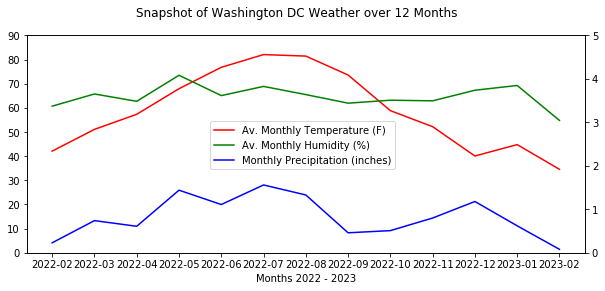

<Figure size 432x288 with 0 Axes>

In [21]:
#Address question 2 - What are general weather trends in Washington DC for the last year?
#Plot 1 - Monthly averages

# Create the x-axis
year_month = weather_monthlyP.index

#Set up subplots
fig, ax1 = plt.subplots()
ax1.set_xlabel("Months 2022 - 2023")

# Plot the monthly averages and monthly total vs year-month
ax1.plot(year_month, weather_monthlyT, color="red", label="Av. Monthly Temperature (F)")
ax1.plot(year_month, weather_monthlyH, color="green", label="Av. Monthly Humidity (%)")
plt.ylim(0,90)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

ax2.plot(year_month, weather_monthlyP, color="blue", label="Monthly Precipitation (inches)")
plt.ylim(0,5)

# Place legend and title and resize
fig.legend(loc="center")
fig.suptitle("Snapshot of Washington DC Weather over 12 Months")
fig.set_figwidth(10)

# Print chart to the screen
plt.show()

#Save figure
plt.savefig("output_figures/Fig1-WeatherTrends")

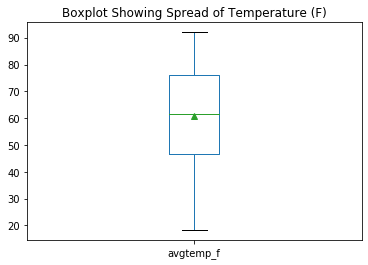

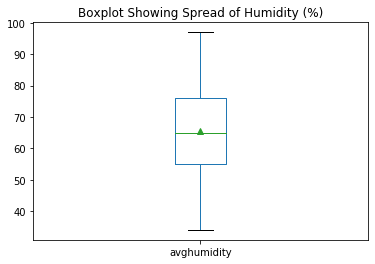

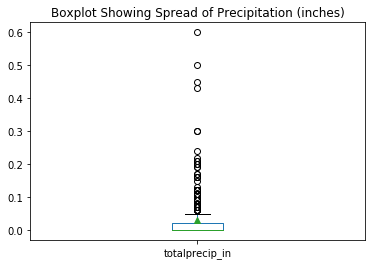

<Figure size 432x288 with 0 Axes>

In [22]:
#Address question 2 - What are general weather trends in Washington DC for the last year?
#Plot 2 - Look at spread of the data

ax = weather_day[['avgtemp_f']].plot(kind='box', title='Boxplot Showing Spread of Temperature (F)', showmeans=True)
ax1 = weather_day[['avghumidity']].plot(kind='box', title='Boxplot Showing Spread of Humidity (%)', showmeans=True)
ax2 = weather_day[['totalprecip_in']].plot(kind='box', title='Boxplot Showing Spread of Precipitation (inches)', showmeans=True)

plt.show() 

#Save figure
plt.savefig("output_figures/Fig2-WeatherDataSpread")

In [23]:
#Address question 2 - What are general weather trends in Washington DC for the last year?
#Plot 3 - We could look at normality of the data? Ran out of time...